In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Assuming the file is named 'train.csv'
data = pd.read_csv("train.csv", na_values='na')


Saving train.csv to train.csv


In [ ]:
data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [ ]:
data.isnull().sum()

,0
class,0
aa_000,0
ab_000,27896
ac_000,2141
ad_000,9200
...,...
ee_007,379
ee_008,379
ee_009,379
ef_000,1730


In [ ]:
data.shape

(36188, 171)

In [ ]:
data['class'].value_counts()

,count
class,
neg,35188
pos,1000


problem 1 data imbalance
problem 2 null values

to store the numerical and categorical columns separately.

In [ ]:
num_cols = data.select_dtypes(include=['number']).columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns

In [ ]:
missing= (data.isnull().sum() / len(data) * 100).to_frame().sort_values(by=0, ascending=False)
missing

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
...,...
cj_000,0.560959
ci_000,0.560959
bt_000,0.237648
aa_000,0.000000


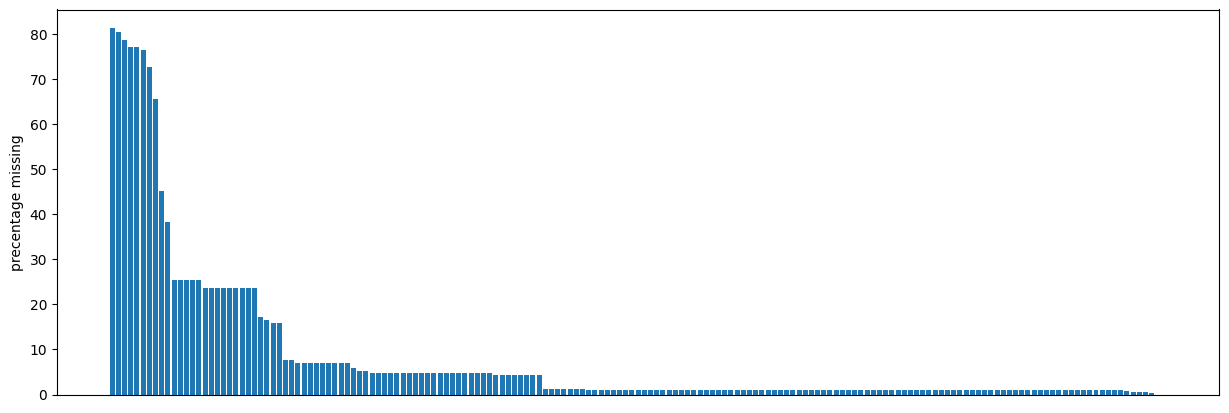

In [ ]:
#checking the missing values
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(15,5))
ax.bar(missing.index,missing.values.T[0])
plt.xticks([])
plt.ylabel("precentage missing")
plt.show()

In [ ]:
#thumb rule-70% missing - delete the col
dropcols=missing[missing[0]>70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [ ]:
#dropping the col from main dataset
data.drop(list(dropcols.index),axis=1,inplace=True)
data

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,11804.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,323436.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,1249396.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,8123016.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,0.0,0.0,0.0,55620.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,neg,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,neg,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,neg,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [ ]:
data.shape

(36188, 164)

In [65]:
#Total Missing Values of a dataset
data.isnull().sum().sum()

318736

In [67]:
# find out the total missing values of a dataset

missing_value_count = data.isnull().sum()
total_cells = np.product(data.shape)
total_missing = missing_value_count.sum()

print(f"precentage of missing data for entire dataset is {(total_missing/total_cells)*100} %")

precentage of missing data for entire dataset is 5.37059852747306 %


In [ ]:
pos=data[data['class'] == 'pos'].shape[0]
neg=data[data['class'] == 'neg'].shape[0]
pos,neg

(1000, 35188)

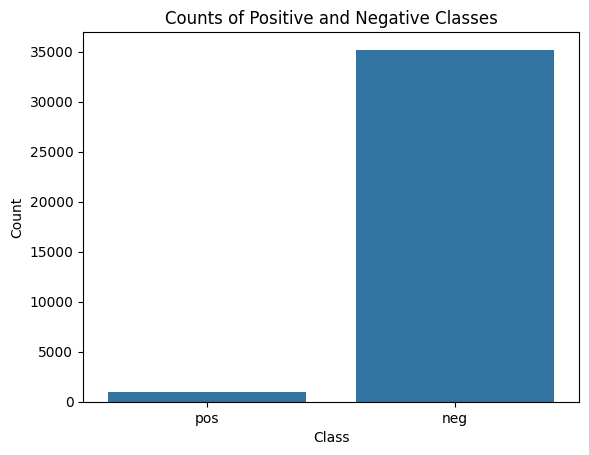

In [ ]:
sns.countplot(x='class', data=data)
plt.title('Counts of Positive and Negative Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
#splitting the data
x=data.drop('class',axis=1)
y=data['class']
y=y.replace({"pos":1,"neg":0})

In [ ]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
36183,0
36184,0
36185,0
36186,0


In [ ]:
#Scaler techniques
#due to different size of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from statistics import mean

In [ ]:
rs=RobustScaler()
X1=rs.fit_transform(x)

In [ ]:
#exp1 knn imputer with robustScaling

results = []
neig_knn = [2,3]
for k in neig_knn:
    pipeline = Pipeline(steps=[("imputer", KNNImputer(n_neighbors=k)),
                               ("model", LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring="accuracy", cv=2,n_jobs=-1)
    results.append(scores)
    print(f"n_neighbors = {k} || accuracy = {mean(scores)}")

n_neighbors = 2 || accuracy = 0.7299381010279651
n_neighbors = 3 || accuracy = 0.7350226594451199


In [ ]:
#pipeline for KNN Imputer with robust scaler
knn_pipeline = Pipeline(steps=[
    ("imputer", KNNImputer(n_neighbors=3)),
    ("Robust", RobustScaler())
])
knn_pipeline

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('Robust', RobustScaler())])

In [ ]:
knn_pipeline

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('Robust', RobustScaler())])

In [ ]:
X_knn = knn_pipeline.fit_transform(x)

In [ ]:
# balance the data
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(X_knn, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "Random forest" : RandomForestClassifier(),
    "Decision tree" : DecisionTreeClassifier(),
    "logisitic Regression" : LogisticRegression(),
    "knn classifier" : KNeighborsClassifier(),
    "xgb" : XGBClassifier()
}

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
                            confusion_matrix


def evaluate_clf(true, predicted):

    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    pre = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc = roc_auc_score(true, predicted)
    return acc, f1, pre, recall, roc

def total_cost(y_true,y_pred):
  tn,fp,fn,tp=confusion_matrix(y_true,y_pred).ravel()
  cost=10*fp+500*fn# which has lowest cost function becase both fn and fp in important in this analysis
  # and fn is more important
  return cost

In [ ]:
from sklearn.model_selection import train_test_split

def evaluate_model(X, y, models):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

    cost_list = []
    model_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # training the model

        # make prediction
        y_test_pred = model.predict(X_test)

        acc, f1, pre, recall, roc = evaluate_clf(y_test, y_test_pred)

        # calculate the cost
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])

        print("Model performance for test Set")
        print(f"- Accuracy: {acc}")
        print(f"- f1 score: {f1}")
        print(f"- precision score: {pre}")
        print(f"- Recall: {recall}")
        print(f"- roc: {roc}")
        print(f"- total cost : {test_cost}")

        cost_list.append(test_cost)

        print("="*35)
        print("\n")

    report = pd.DataFrame(list(zip(model_list, cost_list)),
                               columns=["Model Name", 'Cost']).sort_values(by=["Cost"])

    return report

In [ ]:
#exp1 -knn and robust scaler
report_knn = evaluate_model(X_res, y_res, models)

Random forest
Model performance for test Set
- Accuracy: 0.9913031080695751
- f1 score: 0.9913646659116648
- precision score: 0.988286762630539
- Recall: 0.9944618006248225
- roc: 0.9912904479791733
- total cost : 20330


Decision tree
Model performance for test Set
- Accuracy: 0.9860992301112061
- f1 score: 0.9861966447228712
- precision score: 0.9832039520112915
- Recall: 0.989207611474013
- roc: 0.9860867716688703
- total cost : 39190




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logisitic Regression
Model performance for test Set
- Accuracy: 0.590818363273453
- f1 score: 0.6951025177945396
- precision score: 0.5552443991853361
- Recall: 0.9291394490201648
- roc: 0.589462366937795
- total cost : 301910


knn classifier
Model performance for test Set
- Accuracy: 0.9756201881950385
- f1 score: 0.975986518747367
- precision score: 0.9652777777777778
- Recall: 0.9869355296790685
- roc: 0.9755748361249623
- total cost : 48500


xgb
Model performance for test Set
- Accuracy: 0.9954376960364985
- f1 score: 0.9954667799971668
- precision score: 0.9930751837196156
- Recall: 0.9978699233172394
- roc: 0.9954279476305637
- total cost : 7990




In [ ]:
report_knn

,Model Name,Cost
4,xgb,7990
0,Random forest,20330
1,Decision tree,39190
3,knn classifier,48500
2,logisitic Regression,301910


In [35]:
# experiment 2 Median - Simple imputer and robust scaling

# pipeline for KNN imputer with Robust scaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
med_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("Robust", RobustScaler())
])

In [36]:
X_med = med_pipeline.fit_transform(x)

In [37]:
# balance the data
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(X_med, y)

In [38]:
report_med = evaluate_model(X_res, y_res, models)

Random forest
Model performance for test Set
- Accuracy: 0.9919377853881278
- f1 score: 0.9920293433025323
- precision score: 0.9876404494382023
- Recall: 0.9964574181663597
- roc: 0.9919059615619843
- total cost : 13380


Decision tree
Model performance for test Set
- Accuracy: 0.9872288812785388
- f1 score: 0.9873845936993445
- precision score: 0.982192933258553
- Recall: 0.992631429786028
- roc: 0.9871908406294703
- total cost : 27270




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logisitic Regression
Model performance for test Set
- Accuracy: 0.6230736301369864
- f1 score: 0.7091339536420194
- precision score: 0.5798667386998019
- Recall: 0.912569080345756
- roc: 0.6210352227422127
- total cost : 355160


knn classifier
Model performance for test Set
- Accuracy: 0.970105593607306
- f1 score: 0.9706438730470118
- precision score: 0.959950110864745
- Recall: 0.9815785744650701
- roc: 0.9700248095776995
- total cost : 67890


xgb
Model performance for test Set
- Accuracy: 0.9965753424657534
- f1 score: 0.9966096906342704
- precision score: 0.9935220391494156
- Recall: 0.9997165934533088
- roc: 0.9965532241587566
- total cost : 1460




In [39]:
report_med

,Model Name,Cost
4,xgb,1460
0,Random forest,13380
1,Decision tree,27270
3,knn classifier,67890
2,logisitic Regression,355160


In [40]:
# experiment 3 - Simple imputer Mean and robust scaling

# pipeline for KNN imputer with Robust scaler
mean_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("Robust", RobustScaler())
])

X_mean = mean_pipeline.fit_transform(x)

from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(X_mean, y)

In [41]:
report_mean = evaluate_model(X_res, y_res, models)

Random forest
Model performance for test Set
- Accuracy: 0.9923762023512647
- f1 score: 0.992424778761062
- precision score: 0.9869050971557308
- Recall: 0.998006549907447
- roc: 0.9923717860775112
- total cost : 7930


Decision tree
Model performance for test Set
- Accuracy: 0.9848236551478446
- f1 score: 0.9849075320626373
- precision score: 0.9802538787023978
- Recall: 0.9896055816602591
- roc: 0.98481990434981
- total cost : 37900




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logisitic Regression
Model performance for test Set
- Accuracy: 0.6785179907374421
- f1 score: 0.7402717015887635
- precision score: 0.6213160691854286
- Recall: 0.9155631496511463
- roc: 0.6783320597086308
- total cost : 335690


knn classifier
Model performance for test Set
- Accuracy: 0.9727823298895618
- f1 score: 0.9731892195395846
- precision score: 0.9595847750865052
- Recall: 0.9871849636907305
- roc: 0.9727710329006988
- total cost : 47920


xgb
Model performance for test Set
- Accuracy: 0.995724973281083
- f1 score: 0.9957422651149589
- precision score: 0.99250247559768
- Recall: 0.9990032749537234
- roc: 0.9957224018807408
- total cost : 4030




In [42]:
report_mean

,Model Name,Cost
4,xgb,4030
0,Random forest,7930
1,Decision tree,37900
3,knn classifier,47920
2,logisitic Regression,335690


In [43]:
#xgboost with median is performing good

In [44]:
#exp 4 PCA
from sklearn.decomposition import PCA

pca_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("Robust", RobustScaler())
])


In [45]:
x_pca = pca_pipeline.fit_transform(x)

In [46]:
var_ratio = {}
for n in range(2,150):
    pc = PCA(n_components=n)
    df_pca = pc.fit(x_pca)
    var_ratio[n] = sum(df_pca.explained_variance_ratio_)

<Axes: >

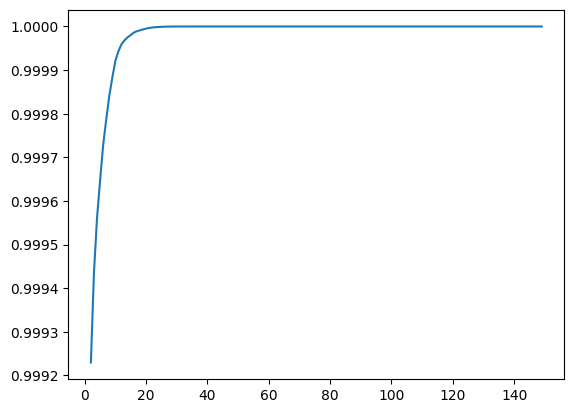

In [47]:
pd.Series(var_ratio).plot()

In [48]:
!pip install kneed

In [49]:
from kneed import KneeLocator

i = np.arange(len(var_ratio))
variance_ratio = list(var_ratio.values())
components = list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio)

<Figure size 500x500 with 0 Axes>

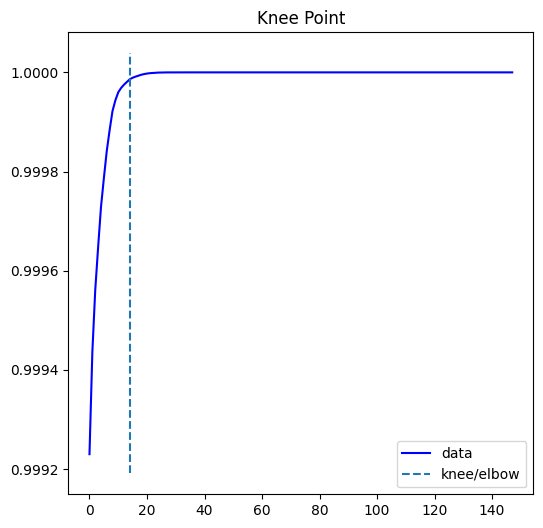

In [50]:

fig = plt.figure(figsize=(5,5))
knee.plot_knee()


In [51]:

pca_final = PCA(n_components=14).fit(x_pca)
reduced = pca_final.fit_transform(x_pca)


In [52]:

from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(reduced, y)


In [53]:
report_pca = evaluate_model(X_res, y_res, models)

Random forest
Model performance for test Set
- Accuracy: 0.9793503979350398
- f1 score: 0.9793400286944045
- precision score: 0.9727803904802622
- Recall: 0.9859887332081467
- roc: 0.9793981251462146
- total cost : 50410


Decision tree
Model performance for test Set
- Accuracy: 0.9701010970101097
- f1 score: 0.970028031337598
- precision score: 0.965379113018598
- Recall: 0.974721941354904
- roc: 0.9701343191968143
- total cost : 89920




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logisitic Regression
Model performance for test Set
- Accuracy: 0.8328672832867283
- f1 score: 0.8088874313355744
- precision score: 0.9353431930223739
- Recall: 0.7125523616929077
- roc: 0.8320022628510096
- total cost : 998410


knn classifier
Model performance for test Set
- Accuracy: 0.9618555961855596
- f1 score: 0.9620433789954338
- precision score: 0.9505145918511209
- Recall: 0.9738552650585006
- roc: 0.9619418694313006
- total cost : 94010


xgb
Model performance for test Set
- Accuracy: 0.9698142969814297
- f1 score: 0.9697579196896775
- precision score: 0.9645613032294942
- Recall: 0.9750108334537051
- roc: 0.9698516581847113
- total cost : 88980




In [54]:
report_pca

,Model Name,Cost
0,Random forest,50410
4,xgb,88980
1,Decision tree,89920
3,knn classifier,94010
2,logisitic Regression,998410


In [55]:
#xgboost classifer with knn-imputer is best model
#final model
final_model = XGBClassifier()

med_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("Robust", RobustScaler())
])
X_med = med_pipeline.fit_transform(x)

from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(X_med, y)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('Robust', RobustScaler())])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=101)


In [57]:
final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [58]:
accuracy_score(y_pred, y_test)

0.9698142969814297

Text(0.5, 0.98, 'Confusion Matrix')

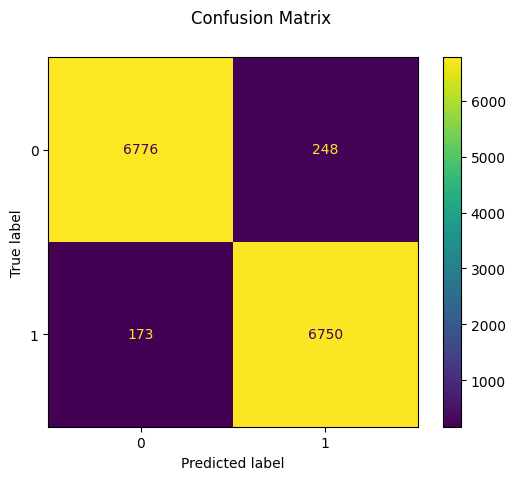

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test,)
cm.figure_.suptitle('Confusion Matrix')